# KNN algorighm

By Fei Han

@Mar, 2018

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import mglearn

In [8]:
print("numpy version = {}".format(np.__version__))
print("scipy version = {}".format(sp.__version__))
print("pandas version = {}".format(pd.__version__))
print("scikit-learn version = {}".format(sklearn.__version__))
print("matplotlib version = {}".format(matplotlib.__version__))
print("mglearn version = {}".format(mglearn.__version__))

numpy version = 1.13.3
scipy version = 1.0.0
pandas version = 0.22.0
scikit-learn version = 0.19.1
matplotlib version = 2.1.0
mglearn version = 0.1.6


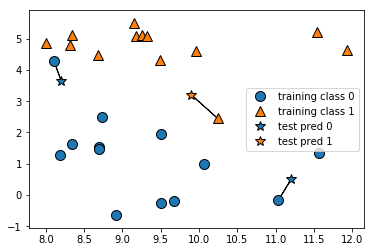

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

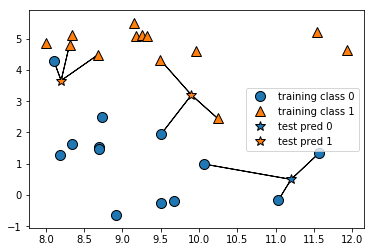

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [63]:
type(X_train)

numpy.ndarray

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Now we fit the clssifier using the training set. 

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
print("Test set predictions {}".format(clf.predict(X_test)))

Test set predictions [1 0 1 0 1 0 0]


To evalute how well our model generalizes, we can call the score method with the test data together with the test labels.

In [15]:
print("Test set accuracy: {:,.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


## analyzing KNeighborsClassifier

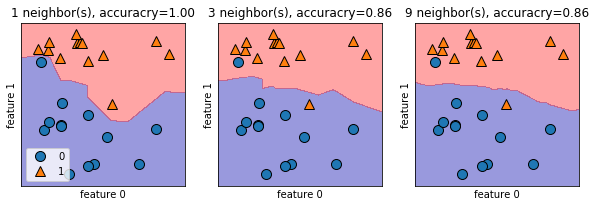

In [20]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True, eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s), accuracry={:,.2f}".format(n_neighbors,clf.score(X_test, y_test)))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)

## KNN on brast cancer data

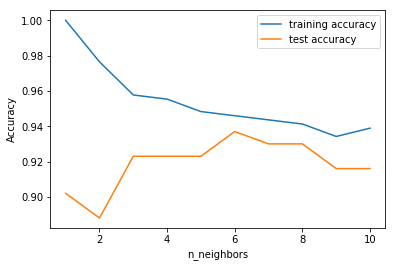

In [58]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
l=[]
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    l.append(n)

plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## k-neighbors regression

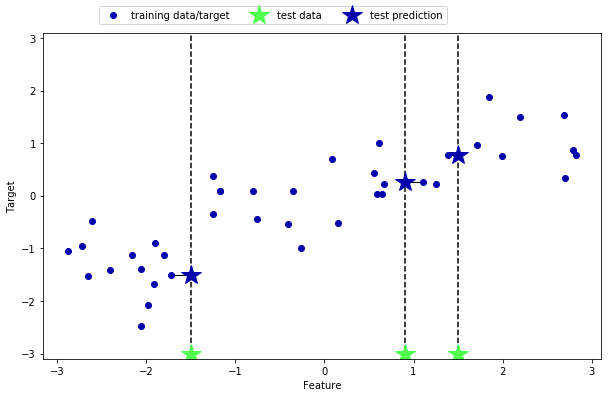

In [60]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

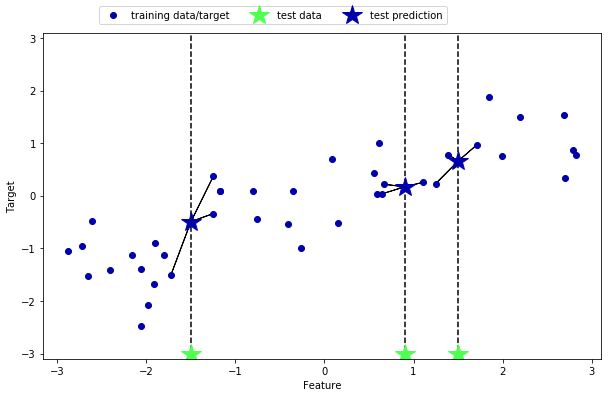

In [61]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
X,y=mglearn.datasets.make_wave(n_samples=40)

In [66]:
# split the wave dataset into a training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)                                          

In [68]:
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

In [69]:
# fit the model using the training data and training target
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [71]:
print("Test set prediction :\n{}".format(reg.predict(X_test)))

Test set prediction :
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [72]:
print("Test set R^2: {:,.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.83


## Analyzing KNeighborsRegressor

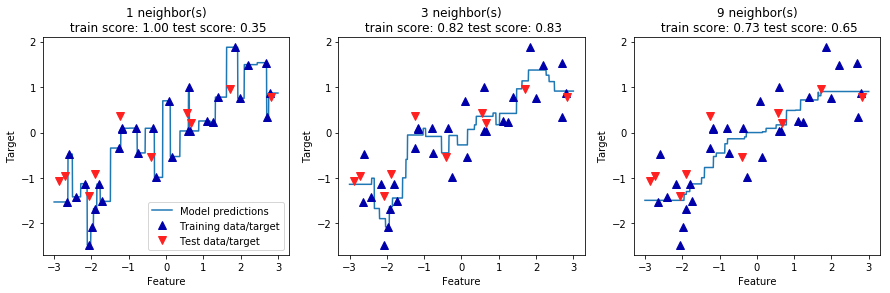

In [76]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train,"^", c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:,.2f} test score: {:,.2f}".format(n_neighbors, reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target","Test data/target"],loc="best")

## Strength, weakness, and parameters

Paremeters
 * number of neighbors
 * measure of distance

Strength
 * easy to unstande
 * gives reasponable performance without a lot adjustments
 * a good baseline method to try before considering more advanced techniques
    
Weakness
 * when training set is very large (eigher in number of featrures or in number of samples), prediction can be very slow
 * does not perform well on datasets with many features (hundreds or more)
 * perform badly with datasets with datasets where most features are 0 most of the time (so-called sparse datasets)

While the KNN is easy to understand, it is not oftern used in practice, due to predition being slow and its inability to handle many features.